In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import Graph
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from networkx.readwrite import json_graph
from random import randint
import sys

In [2]:
sys.path.append("../")

In [3]:
from traffic_simulator.model import Location, Road, Trip

# Generate Static Trips

In [4]:
number_of_nodes = 5

locations = []

for i in range(0, number_of_nodes):
    locations.append(Location(name=str(i)))
    
locations

[Location(name='0'),
 Location(name='1'),
 Location(name='2'),
 Location(name='3'),
 Location(name='4')]

In [5]:
graph = \
{
    "nodes": [],
}

links = [{"source": "0", "target": "1", "distance": 0.4},
         {"source": "0", "target": "4", "distance": 1.0},
         {"source": "1", "target": "3", "distance": 0.8},
         {"source": "4", "target": "2", "distance": 0.1},
         {"source": "3", "target": "4", "distance": 0.7}]
graph["links"] = links
graph

{'nodes': [],
 'links': [{'source': '0', 'target': '1', 'distance': 0.4},
  {'source': '0', 'target': '4', 'distance': 1.0},
  {'source': '1', 'target': '3', 'distance': 0.8},
  {'source': '4', 'target': '2', 'distance': 0.1},
  {'source': '3', 'target': '4', 'distance': 0.7}]}

In [6]:
nodes = []

for location in locations:
    nodes.append({"id": location.name, "uid": str(location.uid)})

graph["nodes"] = nodes
graph

{'nodes': [{'id': '0', 'uid': 'f2a299b3-fb48-48bd-ba6d-1c75a1599792'},
  {'id': '1', 'uid': 'bff51899-e77d-4f22-9a0c-276054aa0e61'},
  {'id': '2', 'uid': '5ffd2863-ef61-4cd9-b3de-b373d243b6bf'},
  {'id': '3', 'uid': '7ca82cc5-354f-477d-81ec-91b82e1b08b7'},
  {'id': '4', 'uid': 'e8c388c7-0b18-4250-9b63-2f5af6269d2a'}],
 'links': [{'source': '0', 'target': '1', 'distance': 0.4},
  {'source': '0', 'target': '4', 'distance': 1.0},
  {'source': '1', 'target': '3', 'distance': 0.8},
  {'source': '4', 'target': '2', 'distance': 0.1},
  {'source': '3', 'target': '4', 'distance': 0.7}]}

In [7]:
def load_graph(graph: str):
    return json_graph.node_link_graph(graph, directed=False)

In [8]:
graph

{'nodes': [{'id': '0', 'uid': 'f2a299b3-fb48-48bd-ba6d-1c75a1599792'},
  {'id': '1', 'uid': 'bff51899-e77d-4f22-9a0c-276054aa0e61'},
  {'id': '2', 'uid': '5ffd2863-ef61-4cd9-b3de-b373d243b6bf'},
  {'id': '3', 'uid': '7ca82cc5-354f-477d-81ec-91b82e1b08b7'},
  {'id': '4', 'uid': 'e8c388c7-0b18-4250-9b63-2f5af6269d2a'}],
 'links': [{'source': '0', 'target': '1', 'distance': 0.4},
  {'source': '0', 'target': '4', 'distance': 1.0},
  {'source': '1', 'target': '3', 'distance': 0.8},
  {'source': '4', 'target': '2', 'distance': 0.1},
  {'source': '3', 'target': '4', 'distance': 0.7}]}

In [9]:
light_blue = "#87CEEB"
node_colors = []

for color in range(0, number_of_nodes):
    node_colors.append(light_blue)

In [10]:
G = load_graph(graph)

In [11]:
link_labels = {(x, y): d["distance"] for x, y, d in G.edges(data=True)}
link_labels

{('0', '1'): 0.4,
 ('0', '4'): 1.0,
 ('1', '3'): 0.8,
 ('2', '4'): 0.1,
 ('3', '4'): 0.7}

<module 'matplotlib.pyplot' from '/Users/facts/mambaforge/envs/traffic_simulator/lib/python3.9/site-packages/matplotlib/pyplot.py'>

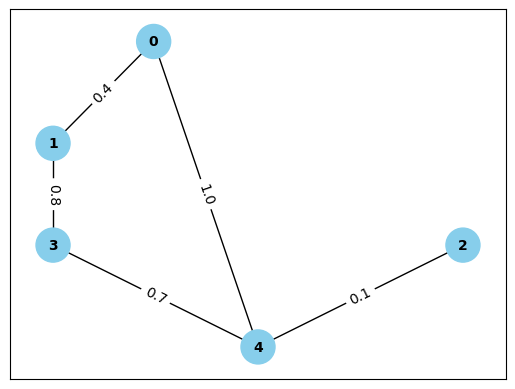

In [12]:
pos = graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos=pos, node_color=node_colors, node_size=600, node_shape='o', with_labels=False)
nx.draw_networkx_labels(G, pos=pos, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=link_labels, font_size=10)
plt

In [13]:
print("Node degree and node cluster")
H = nx.Graph(G)

for node in nx.nodes(H):
    print(f"{node} {nx.degree(H, node)} {round(nx.clustering(H, node))})")

Node degree and node cluster
0 2 0)
1 2 0)
2 1 0)
3 2 0)
4 3 0)


In [14]:
print("Adjency List")

for line in nx.generate_adjlist(H):
    print(line)

Adjency List
0 1 4
1 3
2 4
3 4
4


# Generate Random Trips

In [15]:
seed = 1000           # seed the graph for reproducibility, you should be doing this once you generate a connected graph
G = nx.gnp_random_graph (60, .05, seed=seed) # uncomment this and the above line once you have a connected graph.

In [16]:
for u, v in G.edges:
  G.add_edge(u, v, weight=randint(5,25))

In [17]:
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

In [18]:
light_blue = "#87CEEB"
node_colors = []

for color in range(0, len(G.nodes)):
    node_colors.append(light_blue)

<module 'matplotlib.pyplot' from '/Users/facts/mambaforge/envs/traffic_simulator/lib/python3.9/site-packages/matplotlib/pyplot.py'>

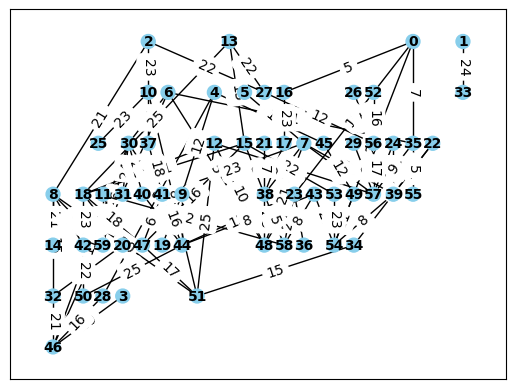

In [19]:
pos = graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos=pos, node_color=node_colors, node_size=100, node_shape='o', with_labels=False)
nx.draw_networkx_labels(G, pos=pos, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt

In [20]:
print(f"Length of edges {len(G.edges)}")

Length of edges 92


In [23]:
print("Node degree and node cluster")

for node in nx.nodes(G):
    print(f"{node} {nx.degree(G, node)} {round(nx.clustering(G, node))})")

Node degree and node cluster
0 4 0)
1 1 0)
2 3 0)
3 1 0)
4 3 0)
5 1 0)
6 4 0)
7 6 0)
8 6 0)
9 3 0)
10 4 0)
11 3 0)
12 4 0)
13 3 0)
14 1 0)
15 5 0)
16 2 0)
17 2 0)
18 6 0)
19 1 0)
20 3 0)
21 1 0)
22 2 0)
23 5 0)
24 2 0)
25 1 0)
26 1 0)
27 3 0)
28 2 0)
29 1 0)
30 6 0)
31 1 0)
32 3 0)
33 1 0)
34 2 0)
35 4 0)
36 1 0)
37 2 0)
38 6 0)
39 4 0)
40 2 0)
41 5 0)
42 3 0)
43 3 0)
44 6 0)
45 2 0)
46 5 0)
47 4 0)
48 5 0)
49 2 0)
50 2 0)
51 5 0)
52 1 0)
53 2 0)
54 5 0)
55 1 0)
56 4 0)
57 6 0)
58 4 0)
59 3 0)


In [24]:
print("Adjency List")

for line in nx.generate_adjlist(H):
    print(line)

Adjency List
0 1 4
1 3
2 4
3 4
4


In [25]:
dir(nx)

['AmbiguousSolution',
 'ArborescenceIterator',
 'DiGraph',
 'EdgePartition',
 'ExceededMaxIterations',
 'Graph',
 'GraphMLReader',
 'GraphMLWriter',
 'HasACycle',
 'LCF_graph',
 'LFR_benchmark_graph',
 'MultiDiGraph',
 'MultiGraph',
 'NetworkXAlgorithmError',
 'NetworkXError',
 'NetworkXException',
 'NetworkXNoCycle',
 'NetworkXNoPath',
 'NetworkXNotImplemented',
 'NetworkXPointlessConcept',
 'NetworkXTreewidthBoundExceeded',
 'NetworkXUnbounded',
 'NetworkXUnfeasible',
 'NodeNotFound',
 'NotATree',
 'PlanarEmbedding',
 'PowerIterationFailedConvergence',
 'SpanningTreeIterator',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_dispatch',
 '_lazy_import',
 'adamic_adar_index',
 'add_cycle',
 'add_path',
 'add_star',
 'adjacency',
 'adjacency_data',
 'adjacency_graph',
 'adjacency_matrix',
 'adjacency_spectrum',
 'adjlist',
 'algebraic_connectivity',
 'algebraicconnectivity',
 'algorithms',
 

In [29]:
nx.dijkstra_path(G, 0, 4)

[0, 23, 44, 9, 4]